## Experiment Person 2

1. Person: Nathan Faucett
2. Time to create: approx. 1 hour
3. Questions: 21
4. Time per Question: approx. 2-3 minutes
5. Dataset: v1.0_en

In [1]:
from importlib import reload
import re
import sys
sys.path.append('../')
import libs.stats as stats
import libs.utils as utils
import numpy as np
import pandas as pd
import asag_regex as asag_re
import json
reload(asag_re)

<module 'asag_regex' from '/home/che/Work/research/masters_project/automatic_question_answering/research/notebooks/research_full/paper/01_regex_experiments/asag_regex.py'>

In [2]:
# import the data
df = asag_re.read_df('../datasets/asag_v1_en.csv')
display(df.head(3))

# import the user annotated dataset
df_p3 = asag_re.read_df('./results/asag_regex_p3_daniel.csv')
display(df_p3.head(3))
print('Size: {}'.format(len(df_p3)))

AID  QID                                   Prompt  \
0    1    1  What does a function signature include?   
1    1    1  What does a function signature include?   
2    1    1  What does a function signature include?   

                                        Model Answer  Score  SID  \
0  The name of the function and the types of the ...    4.5    6   
1  The name of the function and the types of the ...    3.0    5   
2  The name of the function and the types of the ...    5.0    8   

                                      Student Answer  
0  It includes the name of the program, the type ...  
1  it includes the specific information about the...  
2  The function signature includes the name of th...

AID  QID                                          Prompt  \
0    1    1         What does a function signature include?   
1    1    2          What is the scope of global variables?   
2    1    3  How does the compiler handle inline functions?   

                                        Model Answer  \
0  The name of the function and the types of the ...   
1                                        File scope.   
2  It makes a copy of the function code in every ...   

                                 Full Credit Matches  \
0  {\n    "name_of_function" : [\n        "names?...   
1  {\n    "scope_of_file" : [\n        "file(.*)(...   
2  {\n    "copy_function" : [\n        "copy(.*)(...   

                              Partial Credit Matches  
0  {\n    "name_of_function" : [\n        "(funct...  
1                                                 {}  
2                                                 {}

Size: 21


In [3]:
reload(asag_re)
result = asag_re.evaluate_regex(df, df_p3)

In [4]:
result.keys()

dict_keys(['y_true', 'y_pred', 'y_raw_true', 'y_raw_pred', 'match_info', 'missed_items', 'hit_items'])

Accuracy: 15.40%
Precision: 38.97%
Recall: 15.40%
F1-Measure: 19.84%
Pearson's R: 0.35
Cohen's Kappa: 0.05
RMSE: 3.43
Y-True Mean: 4.03
Y-Pred Mean: 1.14
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 1.90


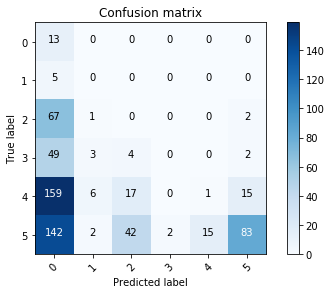

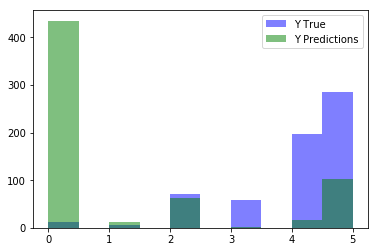

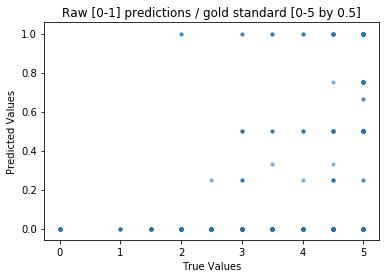

Avg. Difference: 2.973
Std.Deviation of Difference: 1.715


In [24]:
sm.print_big4(result['y_true'], result['y_pred'])
sm.print_stats(result['y_true'], result['y_pred'])
sm.plot_confusion_matrix(sm.cm(result['y_true'], result['y_pred']), np.arange(6))
sm.plot_histogram_comparison(result['y_true'], result['y_pred'], bins=10)
sm.plot_scatter(result['y_raw_true'], result['y_raw_pred'])
sm.diff_stats(result['y_true'], result['y_pred'])

In [25]:
display(np.random.choice(result['missed_items'], 10))

array([583,  47, 195,  82, 317, 358, 528, 483, 629, 179])

In [27]:
indices = [583,  47, 195,  82, 317, 358, 528, 483, 629, 179]

def display_miss(miss, df):
    print('{}.{} [{}].'.format(miss['AID'], miss['QID'], miss['Score']))
    print("PROMPT: {}".format(miss['Prompt']))
    print("RESPONSE: {}".format(miss['Student Answer']))
    fcm = df[np.logical_and(df['AID'] == miss['AID'], df['QID'] == miss['QID'])].iloc[0]['Full Credit Matches']
    pcm = df[np.logical_and(df['AID'] == miss['AID'], df['QID'] == miss['QID'])].iloc[0]['Partial Credit Matches']
    print(fcm)
    print(pcm)

    
for idx in indices:
    display_miss(df.loc[idx, :], df_p2)

3.6 [2.5].
PROMPT: Where are variables declared in a C++ program?
RESPONSE: Inside the method.
{
    "declared_anywhere" : [
        "declare(.*)(anywhere)s?"
    ], "inside_a_function" : [ "inside(.*)a?(.*)(function)s?" ], "outside_a_function" : [ "outside(.*)a?(.*)(function)s?" ]
}
{}
1.2 [4.5].
PROMPT: What is the scope of global variables?
RESPONSE: it is accessible by all functions within a program
{
    "scope_of_file" : [
        "file(.*)(scope|program)s?"
    ]
}
{}
1.7 [3.5].
PROMPT: What are the similarities between iteration and recursion?
RESPONSE: Incorrectly writing either can result in infinite loops, both perform the same task over and over.
{
    "both_involve_repetition" : [
        "both(.*)involve(.*)(repetition|repeat)s?"
    ]
}
{}
1.3 [2.0].
PROMPT: How does the compiler handle inline functions?
RESPONSE: The compiler can ignore the inline qualifier and typically does so for all but the smallest functions.
{
    "copy_function" : [
        "copy(.*)(function|met

Accuracy: 32.381%
Precision: 86.953%
Recall: 32.381%
F1-Measure: 34.688%
Pearson's R: 0.17
Cohen's Kappa: 0.06
RMSE: 0.82
MAE: 0.68
Y-True Mean: 0.86
Y-Pred Mean: 0.19
Y-True Std Deviation: 0.35
Y-Pred Std Deviation: 0.39


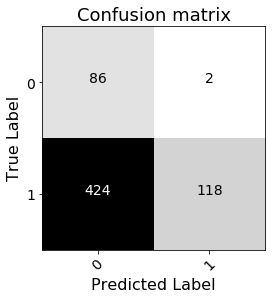

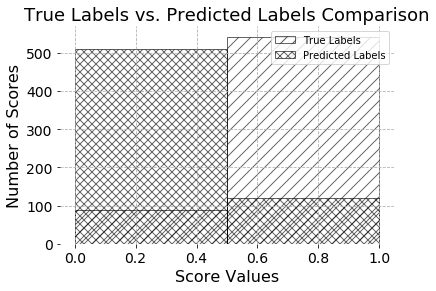

In [5]:
reload(stats)
y_true_pf = utils.convert_to_pass_fail(result['y_true'])
y_pred_pf = utils.convert_to_pass_fail(result['y_pred'])

stats.print_big4(y_true_pf, y_pred_pf)
stats.print_stats(y_true_pf, y_pred_pf)
stats.plot_confusion_matrix(stats.cm(y_true_pf, y_pred_pf), np.arange(2), savefile='./renderings/exp3/e3_pf')
stats.plot_histogram_comparison(y_true_pf, y_pred_pf, bins=2, savefile='./renderings/exp3/e3_pf')